In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Loading csv file to Notebook
original_data = "../Resources/GeneralEsportData.csv"
data = pd.read_csv(original_data,encoding='cp1252')
data

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190262.81,156839.89,255,96
1,Age of Empires II,1999,Strategy,1815535.12,619037.87,1172,815
2,Age of Empires III,2005,Strategy,68113.85,41500.00,106,76
3,Age of Empires Online,2011,Strategy,3778.56,0.00,17,10
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6
...,...,...,...,...,...,...,...
515,Gears of War 3,2011,Third-Person Shooter,7255.81,4555.81,13,4
516,Gears of War 4,2016,Third-Person Shooter,3087285.00,3055000.00,135,41
517,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
518,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


In [3]:
# Splitting DataFrame for game earnings
game_earnings = data[["Game", "TotalEarnings", "OnlineEarnings"]]
game_earnings

,Game,TotalEarnings,OnlineEarnings
0,Age of Empires,190262.81,156839.89
1,Age of Empires II,1815535.12,619037.87
2,Age of Empires III,68113.85,41500.00
3,Age of Empires Online,3778.56,0.00
4,Age of Mythology,52360.00,52000.00
...,...,...,...
515,Gears of War 3,7255.81,4555.81
516,Gears of War 4,3087285.00,3055000.00
517,Gears of War: Ultimate Edition,170000.00,170000.00
518,Rogue Company,50000.00,0.00


In [4]:
# Checking null values
data.isnull().values.any()

False

In [5]:
# Sorting by Total Earnings
data_sorted = data.sort_values("TotalEarnings", ascending=False)
data_sorted

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
163,Dota 2,2013,Multiplayer Online Battle Arena,231860237.22,214390391.34,3999,1496
85,Counter-Strike: Global Offensive,2012,First-Person Shooter,112019077.11,75379935.79,13531,5532
502,Fortnite,2017,Battle Royale,102261009.13,42159597.59,4554,685
168,League of Legends,2009,Multiplayer Online Battle Arena,83048606.83,74989487.17,7385,2509
34,StarCraft II,2010,Strategy,34734474.78,29074484.73,2087,6066
...,...,...,...,...,...,...,...
23,Iron Harvest,2020,Strategy,0.00,0.00,0,0
329,Tekken Tag Tournament,1999,Fighting Game,0.00,0.00,7,4
25,Men of War: Assault Squad 2,2014,Strategy,0.00,0.00,0,0
401,Dream league Soccer,2019,Sports,0.00,0.00,0,0


In [6]:
# Grouping by game Genre
data_grouped = data.groupby("Genre")
data_grouped.sum()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Genre,,,,,
Battle Royale,26233,155661970.82,83457089.64,10824,1401
Collectible Card Game,34261,36428030.22,28979083.64,4146,1561
Fighting Game,329721,21092314.15,19425528.59,12927,9271
First-Person Shooter,213134,244840668.11,177289175.06,38487,11831
Multiplayer Online Battle Arena,42278,372308004.75,337313883.26,16004,5258
Puzzle Game,28113,50327.66,33195.55,151,60
Racing,104581,9313822.03,5469502.60,2899,1048
Role-Playing Game,12061,6377952.83,5461744.43,750,206
Sports,136749,30753107.15,20661523.90,3867,2506


In [7]:
# Sorting Genre group by Total Earnings
data_grouped_sorted = data_grouped.sum().sort_values("TotalEarnings", ascending=False)
data_grouped_sorted = data_grouped_sorted[["TotalEarnings", "OnlineEarnings", "TotalPlayers", "TotalTournaments"]]
data_grouped_genre_total_earnings = data_grouped_sorted.reset_index()
data_grouped_genre_total_earnings

,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Multiplayer Online Battle Arena,372308004.75,337313883.26,16004,5258
1,First-Person Shooter,244840668.11,177289175.06,38487,11831
2,Battle Royale,155661970.82,83457089.64,10824,1401
3,Strategy,69818217.51,54086215.12,9155,9883
4,Collectible Card Game,36428030.22,28979083.64,4146,1561
5,Sports,30753107.15,20661523.90,3867,2506
6,Fighting Game,21092314.15,19425528.59,12927,9271
7,Racing,9313822.03,5469502.60,2899,1048
8,Role-Playing Game,6377952.83,5461744.43,750,206
9,Third-Person Shooter,5511986.38,4296751.38,468,97


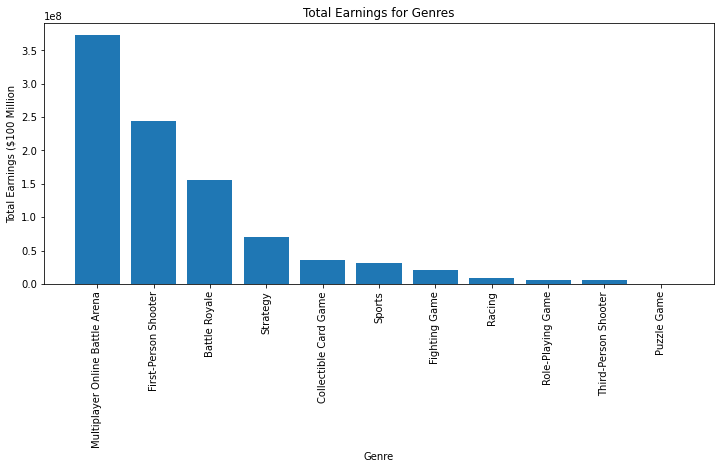

In [29]:
# Plot earnings for each genre
plt.figure(figsize=(12, 4.8))
plt.bar(data_grouped_genre_total_earnings["Genre"],data_grouped_genre_total_earnings["TotalEarnings"], align = "center")
plt.title("Total Earnings for Genres")
plt.ylabel("Total Earnings ($100 Million")
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.show()

In [8]:
# Grouping by Release Date
data_release_date = data.groupby("ReleaseDate", as_index = False)
data_release_date = data_release_date.sum().sort_values("ReleaseDate", ascending=False)
data_release_date

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
29,2020,10391035.88,557451.86,4591,879
28,2019,20404042.56,7399146.53,3124,632
27,2018,23496361.53,20767377.96,4553,2094
26,2017,160977471.16,91827814.17,11068,1831
25,2016,50370567.83,40828580.16,6576,1731
24,2015,86259912.93,66876498.67,8160,3543
23,2014,42316811.14,32541162.77,6274,3247
22,2013,237931439.82,218924457.47,5924,2481
21,2012,119988738.12,81669036.15,14693,5942
20,2011,2154982.62,1699091.84,915,560


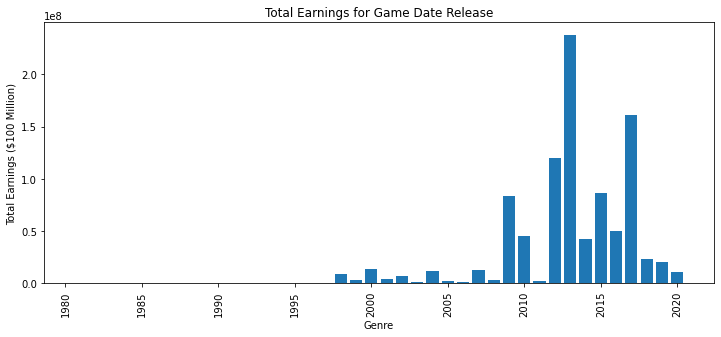

In [35]:
# plot earnings for game data releases
plt.figure(figsize=(12, 4.8))
plt.bar(data_release_date["ReleaseDate"],data_release_date["TotalEarnings"], align = "center")
plt.title("Total Earnings for Game Date Release")
plt.ylabel("Total Earnings ($100 Million)")
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.show()

# SQLAlchemy

In [23]:
from password import password
# Connect to database
rds_connection_string = f"postgres:{password}@localhost:5432/esports_db" ## Change password in password.py
engine = create_engine(f'postgresql://{rds_connection_string}')

In [10]:
data_grouped_genre_total_earnings.to_sql(name='genre_totals', con=engine, if_exists='replace', index=False)

In [11]:
data_release_date.to_sql(name='year_earnings', con=engine, if_exists='replace', index=False)

In [12]:
game_earnings.to_sql(name='game_total_earnings', con=engine, if_exists='replace', index=False)

In [25]:
pd.read_sql_query('select * from year_earnings', con=engine).head()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,2020,10391035.88,557451.86,4591,879
1,2019,20404042.56,7399146.53,3124,632
2,2018,23496361.53,20767377.96,4553,2094
3,2017,160977471.16,91827814.17,11068,1831
4,2016,50370567.83,40828580.16,6576,1731
